# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [345]:
import pandas as pd
import os
import io
import json
import shapely
import geopandas as gpd
import matplotlib.pylab as pl
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import zipfile
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [208]:
# Read the csv
#% of homicides by firearm
df1 = pd.read_csv("World firearms murders and ownership - Sheet 1.csv")
#date.value_counts()
df1.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [209]:
# Drops columns
d=df1.drop(['ISO code', 'Source', 'Rank by rate of ownership'], axis=1)
d.head()

,Country/Territory,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Average firearms per 100 people,Average total all civilian firearms
0,Albania,65.9,56.0,1.76,8.6,270000.0
1,Algeria,4.8,20.0,0.06,7.6,1900000.0
2,Angola,NaN,NaN,NaN,17.3,2800000.0
3,Anguilla,24.0,1.0,7.14,NaN,NaN
4,Argentina,52.0,1198.0,3.02,10.2,3950000.0


In [210]:
# Read the csv
#gunshooting 
gs = pd.read_csv("data-pvLFI (1).csv")
#date.value_counts()
gs.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [156]:
!unzip -o Data_Extract_From_World_Development_Indicators.zip
# GDP FILES 

Archive:  Data_Extract_From_World_Development_Indicators.zip
  inflating: 5bac47c7-7800-4ab0-b70e-684ae28dba01_Data.csv  
  inflating: 5bac47c7-7800-4ab0-b70e-684ae28dba01_Definition and Source.csv  


In [211]:
# Read the csv
#GDP
df2 = pd.read_csv("5bac47c7-7800-4ab0-b70e-684ae28dba01_Data.csv")
#date.value_counts()
df2.head()

,﻿Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017]
0,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,AFG,..,..,10190529882.4878,12486943505.7381,15936800636.2487,17930239399.8149,20536542736.7297,20264253973.7858,20616104298.4975,19215562179.0117,19469022207.6852,20815300220.0428
1,GDP (current US$),NY.GDP.MKTP.CD,Albania,ALB,2101624962.5,3632043907.97733,12881352687.7773,12044212903.8168,11926953258.916,12890867538.5302,12319784787.2987,12776277515.48,13228244357.1813,11386931489.7968,11883682170.8236,13039352743.9616
2,GDP (current US$),NY.GDP.MKTP.CD,Algeria,DZA,62045099642.7774,54790245600.5846,171000691877.714,137211039898.193,161207268655.392,200019057307.655,209058991952.125,209755003250.664,213810022462.428,165874330876.321,159049096745.249,170370810917.971
3,GDP (current US$),NY.GDP.MKTP.CD,American Samoa,ASM,..,..,563000000,678000000,576000000,574000000,644000000,641000000,643000000,659000000,658000000,..
4,GDP (current US$),NY.GDP.MKTP.CD,Andorra,AND,1029048481.88051,1434429703.33518,4007353156.58415,3660530702.97305,3355695364.23841,3442062830.13622,3164615186.94591,3281585236.32501,3350736367.25488,2811489408.89431,2877311946.90265,3012914131.16971


In [212]:
ms1= df2[['Country Name','2012 [YR2012]']]
ms1.head()

,Country Name,2012 [YR2012]
0,Afghanistan,20536542736.7297
1,Albania,12319784787.2987
2,Algeria,209058991952.125
3,American Samoa,644000000
4,Andorra,3164615186.94591


In [159]:
!unzip -o Data_Extract_From_World_Development_Indicators_pop.zip
# GDP FILES 

Archive:  Data_Extract_From_World_Development_Indicators_pop.zip
  inflating: 445a04e7-7cb5-4c68-8f01-c2deabfb9814_Data.csv  
  inflating: 445a04e7-7cb5-4c68-8f01-c2deabfb9814_Definition and Source.csv  


In [213]:
# Read csv

df3 = pd.read_csv("445a04e7-7cb5-4c68-8f01-c2deabfb9814_Data.csv")

df3.head()

,﻿Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017]
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,12249114,20093756,27294031,28004331,28803167,29708599,30696958,31731688,32758020,33736494,34656032,35530081
1,"Population, total",SP.POP.TOTL,Albania,ALB,3286542,3089027,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703,2876101,2873457
2,"Population, total",SP.POP.TOTL,Algeria,DZA,25912367,31183660,34860715,35465760,36117637,36819558,37565847,38338562,39113313,39871528,40606052,41318142
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,47038,57521,57030,56227,55637,55320,55230,55307,55437,55537,55599,55641
4,"Population, total",SP.POP.TOTL,Andorra,AND,54509,65390,83861,84462,84449,83751,82431,80788,79223,78014,77281,76965


In [214]:
ms= df3[['Country Name','2012 [YR2012]']]
ms.head()

,Country Name,2012 [YR2012]
0,Afghanistan,30696958
1,Albania,2900401
2,Algeria,37565847
3,American Samoa,55230
4,Andorra,82431


In [215]:
df = ms1.merge(ms, left_on="Country Name", right_on="Country Name")
df.head()

,Country Name,2012 [YR2012]_x,2012 [YR2012]_y
0,Afghanistan,20536542736.7297,30696958
1,Albania,12319784787.2987,2900401
2,Algeria,209058991952.125,37565847
3,American Samoa,644000000,55230
4,Andorra,3164615186.94591,82431


In [216]:
df.rename(columns={"2012 [YR2012]_x":"gdp"},inplace=True)
df.head()

,Country Name,gdp,2012 [YR2012]_y
0,Afghanistan,20536542736.7297,30696958
1,Albania,12319784787.2987,2900401
2,Algeria,209058991952.125,37565847
3,American Samoa,644000000,55230
4,Andorra,3164615186.94591,82431


In [217]:
df.rename(columns={"2012 [YR2012]_y":"pop"},inplace=True)
df.head()

,Country Name,gdp,pop
0,Afghanistan,20536542736.7297,30696958
1,Albania,12319784787.2987,2900401
2,Algeria,209058991952.125,37565847
3,American Samoa,644000000,55230
4,Andorra,3164615186.94591,82431


In [219]:
from IPython.display import display

display(df.head(2))
display(d.head(2))
display(gs.head(2))

,Country Name,gdp,pop
0,Afghanistan,20536542736.7297,30696958
1,Albania,12319784787.2987,2900401


,Country/Territory,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Average firearms per 100 people,Average total all civilian firearms
0,Albania,65.9,56.0,1.76,8.6,270000.0
1,Algeria,4.8,20.0,0.06,7.6,1900000.0


,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1


In [220]:
display(d.shape)
display(df.shape)
display(gs.shape)

(185, 6)

(289, 3)

(25, 3)

In [222]:
df_merged = gs.merge(df, left_on="Country", right_on="Country Name", how='left')
df_merged = df_merged.merge (d, left_on='Country Name', right_on= "Country/Territory", how='left')
df_merged.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Country Name,gdp,pop,Country/Territory,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Average firearms per 100 people,Average total all civilian firearms
0,Australia,15.0,4,Australia,1543411012579.91,22742475,Australia,11.5,30.0,0.14,15.0,3050000.0
1,Austria,30.4,1,Austria,409425234155.263,8429991,Austria,29.5,18.0,0.22,30.4,2500000.0
2,Belgium,17.2,2,Belgium,497884216568.867,11128246,Belgium,39.5,70.0,0.68,17.2,1800000.0
3,Canada,30.8,4,Canada,1824288757447.57,34750545,Canada,32.0,173.0,0.51,30.8,9950000.0
4,Denmark,12.0,0,Denmark,327148899962.146,5591572,Denmark,31.9,15.0,0.27,12.0,650000.0


In [167]:
df.columns

Index(['Country', 'Guns per 100 inhabitants',
       'Number of mass shootings (1983-2013)', 'Country Name', 'gdp', 'pop'],
      dtype='object')

# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


In [168]:
df.head(2)

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Country Name,gdp,pop
0,Australia,15.0,4,Australia,1543411012579.91,22742475
1,Austria,30.4,1,Austria,409425234155.263,8429991


In [224]:
df.dtypes
df_merged['gdp'] = df_merged['gdp'].astype(float64)

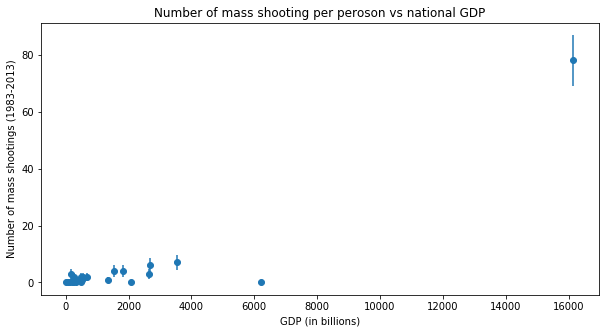

Number of mass shootings(1983-2013) vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [254]:
# Number of mass shootings (1983-2013) vs GPD 
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_merged.gdp / 1e9, df_merged ['Number of mass shootings (1983-2013)'])
ax.errorbar(df_merged.gdp / 1e9, df_merged ['Number of mass shootings (1983-2013)'], 
            yerr = np.sqrt(df_merged['Number of mass shootings (1983-2013)'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shootings (1983-2013)")
ax.set_title('Number of mass shooting per peroson vs national GDP')
ax.set_ylim()
pl.show()
print ("Number of mass shootings(1983-2013) vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


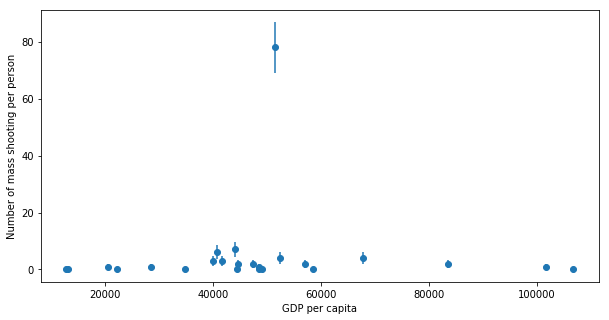

Number of mass shooting (1983-2013) vs GDP per Capita, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [264]:
# Mass shooting vs GDP
fig = pl.figure(figsize=(10,5)) 
ax_mg = fig.add_subplot(111)

scatter_mg = ax_mg.scatter(df_merged['GDPpc'], df_merged['Number of mass shootings (1983-2013)'])
ax_mg.errorbar(df_merged['GDPpc'], df_merged['Number of mass shootings (1983-2013)'], 
            yerr = np.sqrt(df_merged['Number of mass shootings (1983-2013)'] * 1.0), fmt = '.')
ax_mg.set_xlabel("GDP per capita")
ax_mg.set_ylabel("Number of mass shooting per person")
ax.set_title('Number of mass shooting per person vs national GDP per capita')
ax_mg.set_ylim()
pl.show()
print ("Number of mass shooting (1983-2013) vs GDP per Capita, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [229]:
df_merged.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Country Name,gdp,pop,Country/Territory,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Average firearms per 100 people,Average total all civilian firearms
0,Australia,15.0,4,Australia,1.543411e+12,22742475,Australia,11.5,30.0,0.14,15.0,3050000.0
1,Austria,30.4,1,Austria,4.094252e+11,8429991,Austria,29.5,18.0,0.22,30.4,2500000.0
2,Belgium,17.2,2,Belgium,4.978842e+11,11128246,Belgium,39.5,70.0,0.68,17.2,1800000.0
3,Canada,30.8,4,Canada,1.824289e+12,34750545,Canada,32.0,173.0,0.51,30.8,9950000.0
4,Denmark,12.0,0,Denmark,3.271489e+11,5591572,Denmark,31.9,15.0,0.27,12.0,650000.0


In [270]:
df_merged['pop'] = df_merged['pop'].astype(float64)

In [285]:
df_merged['shootingspp'] = df_merged["Number of mass shootings (1983-2013)"] / df_merged['pop'] * 1e3

In [286]:
##df_merged['civilian_fire_arms_pp'] = df_merged["Average total all civilian firearms"] / df_merged['pop'] * 1e3

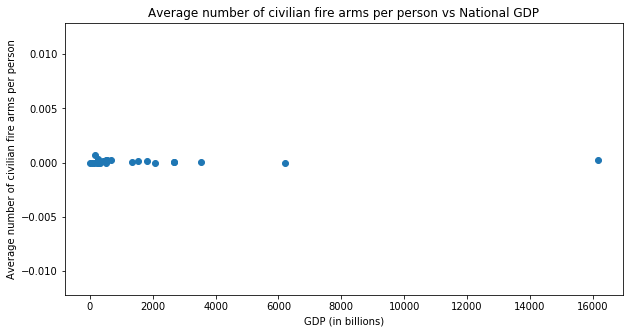

Number of mass shooting (1983-2013) vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [289]:
# Without Errors 
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_merged.gdp / 1e9, df_merged['shootingspp'])
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average number of civilian fire arms per person")
ax.set_title('Average number of civilian fire arms per person vs National GDP')
ax.set_ylim()
pl.show()
print ("Number of mass shooting (1983-2013) vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


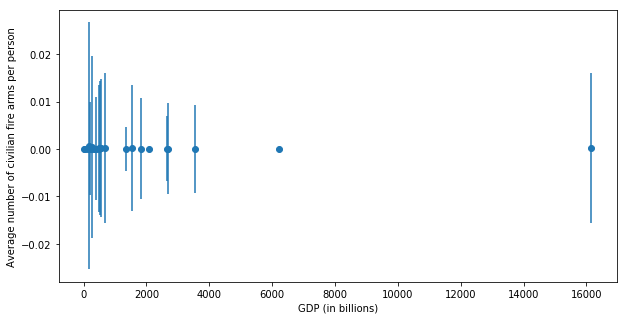

Number of mass shooting (1983-2013) vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [295]:
# With Errors 
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_merged.gdp / 1e9, df_merged['shootingspp'])
ax.errorbar(df_merged.gdp / 1e9, df_merged['shootingspp'], 
            yerr = np.sqrt(df_merged['shootingspp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average number of civilian fire arms per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting (1983-2013) vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

In [251]:
df_merged['pop'] = df_merged['pop'].astype(float64)

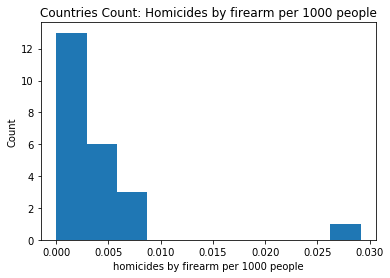

In [297]:
tmp = df_merged.dropna()
# Histogram
fig, ax = plt.subplots()
ax.hist(tmp['Number of homicides by firearm'] / tmp['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people')
ax.set_ylabel('Count')
ax.set_title('Countries Count: Homicides by firearm per 1000 people');

#### Caption: 
Based on the graph above reflects that most countries have less than 0.001 homicider for every 1000 people, however, one country ranges between 0.025 to 0.03 homicides by firmarm per 100 people. 

In [349]:
df_merged['civilian_fire_arms_pp'] = df_merged["Average total all civilian firearms"] / df_merged['pop'] * 1e3

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


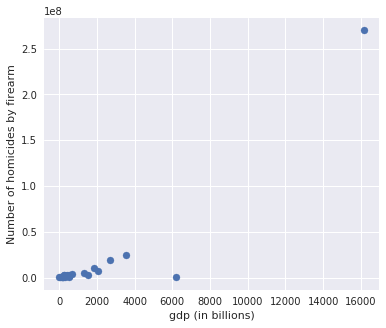

the average number of civilian fire arms per person vs GDP, errors represent Poisson statistics.
The datapoint to the right of the plot is the USA, which has noth the highest GDP and the highest number ofcivilian fire arms per person


In [350]:
fig = plt.figure(figsize=(6,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_merged.gdp / 1e9, df_merged["Average total all civilian firearms"])
ax.errorbar(df_merged.gdp / 1e9, df_merged["Average total all civilian firearms"], 
            yerr = np.sqrt(df_merged["Average total all civilian firearms"] * 1.0), fmt = '.')
ax.set_xlabel("gdp (in billions)")
ax.set_ylabel('Number of homicides by firearm')
ax.set_ylim()
plt.show()
print ("the average number of civilian fire arms per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number ofcivilian fire arms per person")

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [303]:
# Finding US
df_merged['Number of homicides by firearm'][(df_merged['Country']=='United States')]

24    9146.0
Name: Number of homicides by firearm, dtype: float64

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


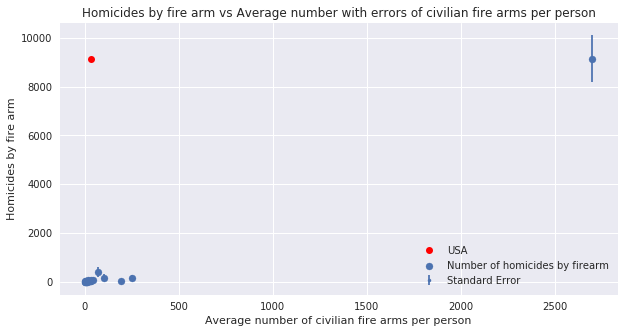

In [351]:
# Without Errors
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter= ax.scatter(df_merged['Average total all civilian firearms']/1e5, df_merged['Number of homicides by firearm'])
ax.errorbar(df_merged['Average total all civilian firearms']/1e5, df_merged['Number of homicides by firearm'],
            yerr = np.sqrt(df_merged['Number of homicides by firearm'] * 100), fmt = '.',label='Standard Error')

scatter_us = ax.plot(df_merged['Average total all civilian firearms'][22]/1e5,df_merged['Number of homicides by firearm'][24],'ro', label='USA')
ax.set_xlabel("Average number of civilian fire arms per person")
ax.set_ylabel("Homicides by fire arm")
ax.set_title('Homicides by fire arm vs Average number with errors of civilian fire arms per person')
ax.set_ylim()
pl.legend()
pl.show()

In [310]:
ax.errorbar(df_merged.gdp / 1e9, df_merged['shootingspp'], 
            yerr = np.sqrt(df_merged['shootingspp'] * 1.0), fmt = '.')

<Container object of 3 artists>

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [311]:
#identfying the USA value
df_merged['Average total all civilian firearms'][(df_merged['Country']=='United States')]

24    270000000.0
Name: Average total all civilian firearms, dtype: float64

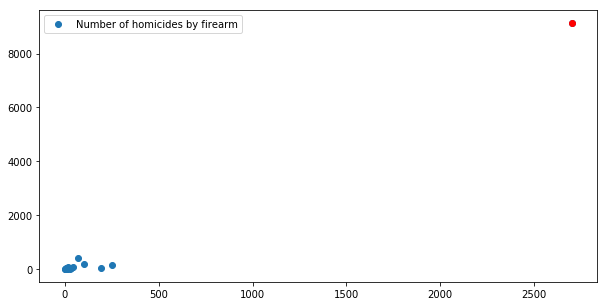

The Red left side dot reflect the USA


In [317]:
# Without Errors
fig = pl.figure(figsize=(10,5)) 

ax = fig.add_subplot(111)

x = df_merged['Average total all civilian firearms'][24]
y =df_merged['Number of homicides by firearm'][24]

scatter_us = ax.plot(x/1e5,y,'ro')
scatter_hc = ax.scatter(df_merged['Average total all civilian firearms']/1e5, df_merged['Number of homicides by firearm'])

ax_hc.set_xlabel("Average number of civilian fire arms per person")
ax_hc.set_ylabel("Homicides by fire arm")
ax_hc.set_ylim()
ax_hc.set_title('Homicides by fire arm vs Average number of civilian fire arms per person')
pl.legend()
pl.show()
print('The Red left side dot reflect the USA')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


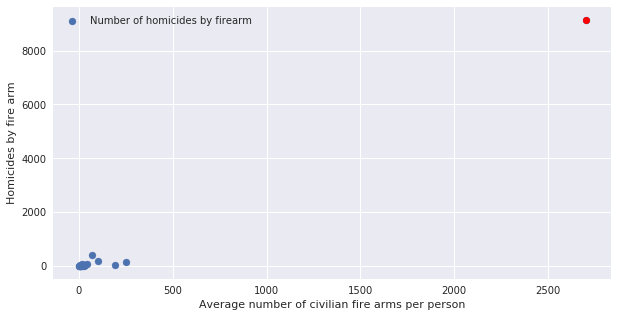

Average number of civilian fire arms per person vs GDP, errors represent Poisson statistics.
The red dot represents USA, which has noth the highest Average civilian firearm per capita and the highest number of homicides by fire arm


In [353]:
# With Errors
ax=pl.figure(figsize=(10,5)).add_subplot(111)

x = df_merged['Average total all civilian firearms'][24]
y =df_merged['Number of homicides by firearm'][24]

scatter_us = ax.plot(x/1e5,y,'ro')
scatter_hc = ax.scatter(df_merged['Average total all civilian firearms']/1e5, df_merged['Number of homicides by firearm'])
ax_hc.errorbar(df_merged['Average total all civilian firearms']/1e5, df_merged['Number of homicides by firearm'],
            yerr = np.sqrt(df_merged['Number of homicides by firearm'] * 100), fmt = '.')

ax.set_xlabel("Average number of civilian fire arms per person")
ax.set_ylabel("Homicides by fire arm")
ax.set_ylim()


pl.legend()
pl.show()

print ("Average number of civilian fire arms per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The red dot represents USA, " + 
       "which has noth the highest Average civilian firearm per capita and the highest number of homicides by fire arm")



# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [ ]:
# using this link as a referance https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

In [325]:
df_merged['Mass_pc_1'] = df_merged['Number of mass shootings (1983-2013)']/df_merged['pop']
df_merged['Fire_pc'] = df_merged['Average total all civilian firearms']/df_merged['pop']

In [326]:
df_merged["Mass_pc_1"]

0     1.758824e-07
1     1.186241e-07
2     1.797228e-07
3     1.151061e-07
4     0.000000e+00
5     3.694146e-07
6     9.138013e-08
7     8.703672e-08
8     0.000000e+00
9              NaN
10    0.000000e+00
11    0.000000e+00
12    0.000000e+00
13    0.000000e+00
14    0.000000e+00
15    0.000000e+00
16    6.805653e-07
17    1.992598e-07
18    0.000000e+00
19    9.510365e-08
20    2.137983e-08
21    2.100978e-07
22    2.500981e-07
23    4.709554e-08
24    2.484130e-07
Name: Mass_pc_1, dtype: float64

In [328]:
df_merged['Fire_pc']

0     0.134110
1     0.296560
2     0.161751
3     0.286326
4     0.116246
5     0.443298
6     0.289370
7     0.310845
8     0.226347
9          NaN
10    0.056450
11    0.280622
12    0.078269
13    0.117569
14    0.005563
15    0.131840
16    0.209841
17    0.278964
18    0.013399
19    0.085593
20    0.096209
21    0.294137
22    0.425167
23         NaN
24    0.859891
Name: Fire_pc, dtype: float64

In [333]:
df_merged["Mass_pc"] =df_merged['Mass_pc_1'] * 1e7

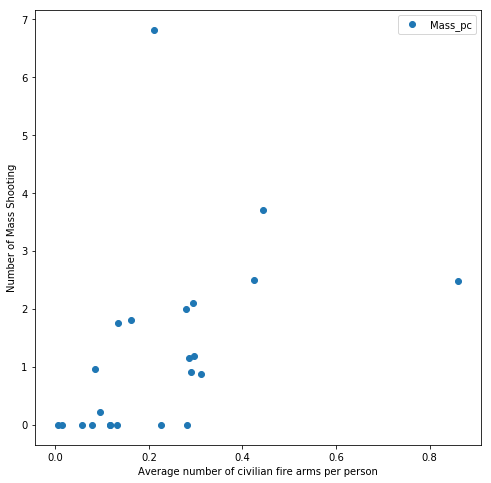

In [341]:
#with error
ax_mod=pl.figure(figsize=(8,8)).add_subplot(111)

scatter_mod = ax_mod.scatter(df_merged['Fire_pc'], df_merged['Mass_pc'])

ax_mod.set_xlabel("Average number of civilian fire arms per person")
ax_mod.set_ylabel("Number of Mass Shooting")
ax_mod.set_ylim()
pl.legend()
pl.show()

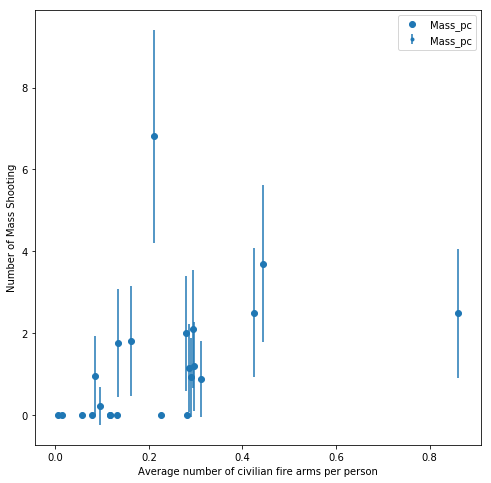

In [342]:
# With Errors
ax_mod=pl.figure(figsize=(8,8)).add_subplot(111)

scatter_mod = ax_mod.scatter(df_merged['Fire_pc'], df_merged['Mass_pc'])
ax_mod.errorbar(df_merged['Fire_pc'], df_merged['Mass_pc'],
            yerr = np.sqrt(df_merged['Mass_pc']), fmt = '.')

ax_mod.set_xlabel("Average number of civilian fire arms per person")
ax_mod.set_ylabel("Number of Mass Shooting")
ax_mod.set_ylim()
pl.legend()
pl.show()


In [346]:
# Fitting an OLS Model
Fit1=smf.ols(formula='Mass_pc ~ 1 + Fire_pc', data=df_merged).fit()
Fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Mass_pc   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     4.981
Date:                Mon, 12 Nov 2018   Prob (F-statistic):             0.0367
Time:                        00:05:53   Log-Likelihood:                -40.676
No. Observations:                  23   AIC:                             85.35
Df Residuals:                      21   BIC:                             87.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3684      0.497      0.742      0.467        -0.665     1.402
Fire_pc        3.8373      1.719      2.232      0.037         0.262     7.413
==============================================================================
Omnibus:                       34.558   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.760
Skew:                           2.666   Prob(JB):                     5.32e-20
Kurtosis:                      11.012   Cond. No.                         5.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

AttributeError: 'DataFrame' object has no attribute 'design_info'

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


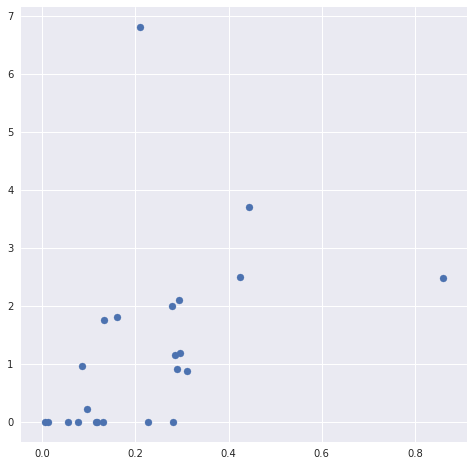

In [354]:
ax_mod=pl.figure(figsize(8,8)).add_subplot(111)
x=df_merged['Fire_pc']
ax_mod.scatter(x, df_merged['Mass_pc'])
ax_mod.plot(x,Fit1.predict(df_merged),'go')
ax_mod.plot(x,Fit1.predict(df_merged),'red', label='OLS fit')
ax_mod.set_xlabel("Average number of civilian fire arms per person")
ax_mod.set_ylabel("Number of Mass Shooting ()")
ax_mod.set_title('OLS fit model: \nNumber of Mass Shooting vs Average number of civilian fire arms per person')
ax_mod.set_ylim()
pl.legend()
pl.show()


## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

In [366]:
i=df_merged[((df_merged.Mass_pc> 6)|( df_merged.Fire_pc > 0.8))].index
df_merged1=df_merged.drop(i)

#i=df_merged[((df_merged.Mass_pc> 6)|( df_merged.Fire_pc > 0.8))].index
#dfmerged =df_merged.drop(i

AttributeError: 'Series' object has no attribute 'predict'

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


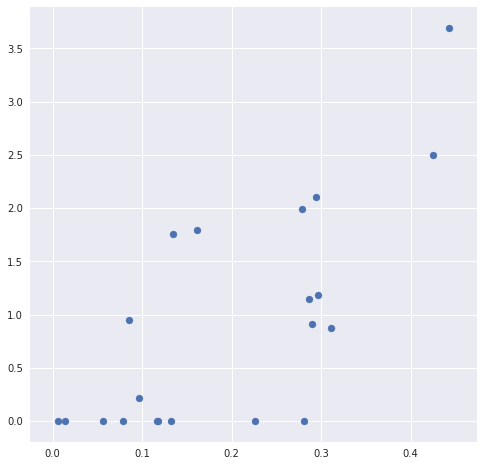

In [374]:
#PLotting OLS and WLS
ax_new=pl.figure(figsize(8,8)).add_subplot(111)
x=df_merged1['Fire_pc']
ax_new.scatter(x, df_merged1['Mass_pc'])
ax_new.plot(x.predict(df_merged1),'go')
ax_new.plot(x.predict(df_merged1),'bo')
ax_new.errorbar(x, df_merged1['Mass_pc'],
            yerr = np.sqrt(df_merged1['Mass_pc']), fmt = '.')
ax_new.plot(x,Fit2.predict(df_merged1),'orange', label='WLS fit')
ax_new.plot(x,Fit1.predict(df_merged1),'red', label='OLS fit')
ax_new.set_xlabel("Average number of civilian fire arms per person")
ax_new.set_ylabel("Number of Mass Shooting")
ax_new.set_title('WLS & OLS Model: \nNumber of Mass Shooting vs Average number of civilian fire arms per person \n(Outliers excluded)')
ax_new.set_ylim()
pl.legend(loc='upper left')
pl.show()
print('Caption: After excluding the outliers, we can see that all the dots are now closer to the two predicted lines.' + 'The slope of both lines are getting smaller.')

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

In [ ]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

In [ ]:
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings